In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(histograms)=
# Sampling Estimates of the Probability Density via Histograms

As in the previous section, consider a random variable $X$ and a function of $X$, $Y=g(X)$.
We wish to approximate the probability density $p(y)$ of $Y=g(X)$ from samples.
We start by splitting the domain of $y$ into $M$ small bins.
Assume these bins have bounds $b_0, b_1, \dots, b_M$.
That is, the first bin is $[b_0,b_1]$, the second one is $[b_1,b_2]$, etc.
We will approximate $p(y)$ with a constant inside each bin.
That is, the approximation is:

$$
\hat{p}_M(y) = \sum_{j=1}^Mc_j 1_{[b_{j-1}, b_j]}(y),
$$

where the $c_j$'s are constants to be determined.
This is a piecewise constant approximation of $p(y)$ and is called a *histogram*.

How do we determine the constants $c_j$?
Each one of these constants is the probability that a sample of $Y$ falls inside the bin, i.e.,

$$
c_j = p(b_{j-1}\le Y \le b_j).
$$

Of course, we can write this probability as 

$$
c_j = F(b_j) - F(b_{j-1}),
$$

where $F(y)$ is the CDF of $Y$.
Therefore, we can approximate the constants using our estimate of the CDF.
In the notation of the previous section, we have that:

$$
\bar{c}_{j,N} := \bar{F}_N(b_j) - \bar{F}_N(b_{j-1}).
$$

Of course, this is nothing more but:

$$
\bar{c}_{j,N} = \frac{\text{number of samples that fall in bin }[b_{j-1},b_j]}{N}
$$

Putting everything together, our estimate for the PDF $p(y)$ is:

$$
\hat{p}_{M,N}(y) = \sum_{j=1}^M\bar{c}_{j,N} 1_{[b_{j-1}, b_j]}(y),
$$

which does converge to $p(y)$ (in some sense) as both $N$ and $M$ go to infinity.

## Example: 1D CDF
We will continue using the 1D test function of Example 3.4 {cite}`robert_monte_2004`.
Assume that $X\sim\mathcal{U}([0,1])$ and pick:

$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

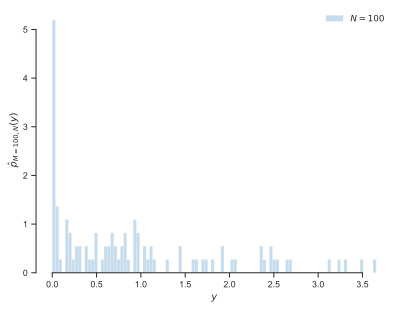

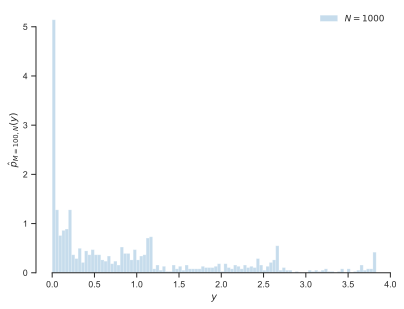

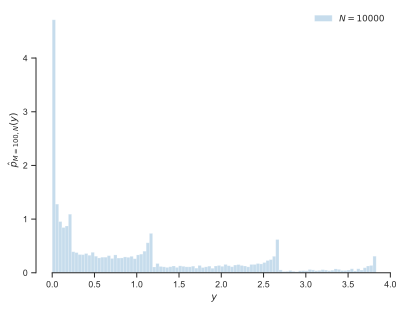

In [2]:
import numpy as np
# define the function here:
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Again, we do not need to write any code for the histogram
# It's already implemented in several packages.
# We will use the matplotlib implementation

# Maximum number of samples to take
max_n = 10000 
# The number of bins
num_bins = 100
# Generate samples from X
x_samples = np.random.rand(max_n)
# Get the corresponding Y's
y_samples = g(x_samples)

# Make the plot
for N in [100, 1000, max_n]:
    fig, ax = plt.subplots()
    ax.hist(
        y_samples[:N],
        label=f"$N={N:d}$",
        bins=num_bins,
        density=True,
        alpha=0.25
    )
    ax.set_xlabel(r"$y$")
    ax.set_ylabel(r"$\hat{{p}}_{{M={0:d},N}}(y)$".format(num_bins))
    plt.legend(loc="best", frameon=False)
    sns.despine(trim=True);

## Questions 

+ Experiment with the number of bins $M$. Repeat the code above with $M=5, 10$, and $1000$. What do you observe? What happens when you have too few bins? What happens when you have too many bins? You should pick the number of bins and $N$ together. As a rule, $N$ should be about ten times $M$. For a given choice of $M$, it is possible to pick how many $N$'s you need using what we will learn in lecture 10.